In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

## Implementing SEIHRD

In [194]:
# Coupling equations as matrix system

def dAdt(t, A):
    s, i, r = A
    dsdt = -beta*s*i
    didt = beta*s*i - gamma*i
    drdt = gamma*i
    return [dsdt, didt, drdt]

beta = 0.0101
gamma = 0.01

# Now each state must be turned into a matrix by cohorts,
# See Tech. Appendix 1 in A.T. Newall (2010) "Cost...Pharmaceutical-Based"

s0 = 99
i0 = 1
r0 = 0
A_0 = [s0, i0, r0]

t = np.linspace(0, 100, num=1000)

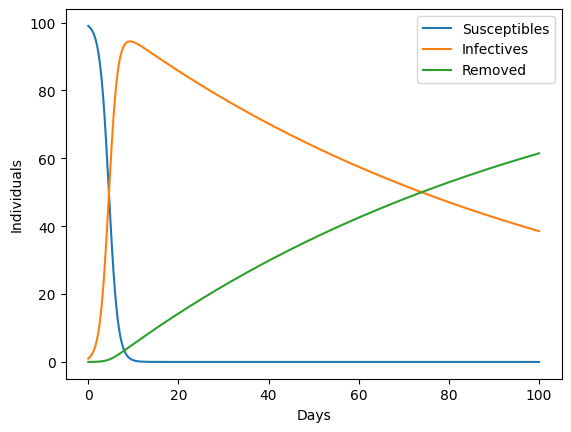

In [195]:
# Solutions
sol = odeint(dAdt, y0=A_0, t=t, tfirst=True)

s_Sol = sol.T[0]
i_Sol = sol.T[1]
r_Sol = sol.T[2]

# Plot axes
plt.xlabel("Days")
plt.ylabel("Individuals")

# Plotting Solution Curves
plt.plot(t, s_Sol, label = "Susceptibles")
plt.plot(t, i_Sol, label = "Infectives")
plt.plot(t, r_Sol, label = "Removed")
plt.legend()
plt.show()

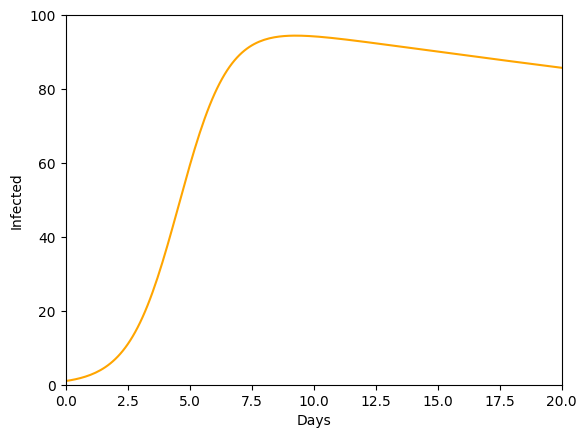

In [196]:
zoom = plt.plot(t, i_Sol, color="orange")
plt.xlabel("Days")
plt.ylabel("Infected")
plt.axis([0, 20, 0, 100])
zoom

#### Alternative ODE Framework

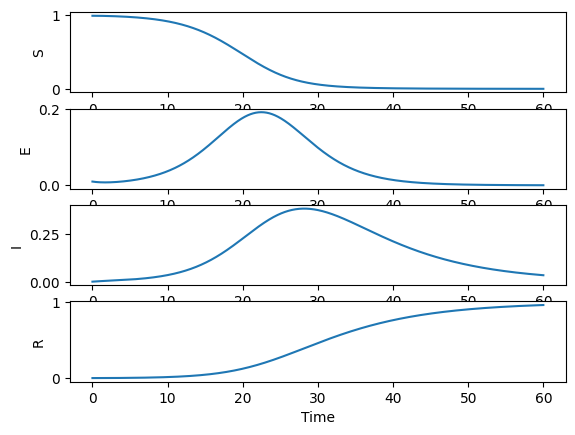

In [197]:
t = np.linspace(0, 60, num=1000)

beta = 0.6
gamma = 0.1
mu = 0.3
params = [beta, gamma, mu]

y0 = [0.99, 0.01, 0, 0]

def sim(variables, t, params):

    S = variables[0]
    E = variables[1]
    I = variables[2]
    R = variables[3]
    N = S + E + I + R

    beta = params[0]
    gamma = params[1]
    mu = params[2]

    dSdt = (-beta * S * I) / N
    dEdt = ((beta * S * I) / N) - (mu * E)
    dIdt = (mu * E) - (gamma * I)
    dRdt = gamma * I

    return ( [dSdt, dEdt, dIdt, dRdt] )

y = odeint(sim, y0, t, args=(params,))

f, (ax1, ax2, ax3, ax4) = plt.subplots(4)

line1 = ax1.plot(t, y[:,0])
line2 = ax2.plot(t, y[:,1])
line3 = ax3.plot(t, y[:,2])
line4 = ax4.plot(t, y[:,3])

ax1.set_ylabel("S")
ax2.set_ylabel("E")
ax3.set_ylabel("I")
ax4.set_ylabel("R")
ax4.set_xlabel("Time")

plt.show()

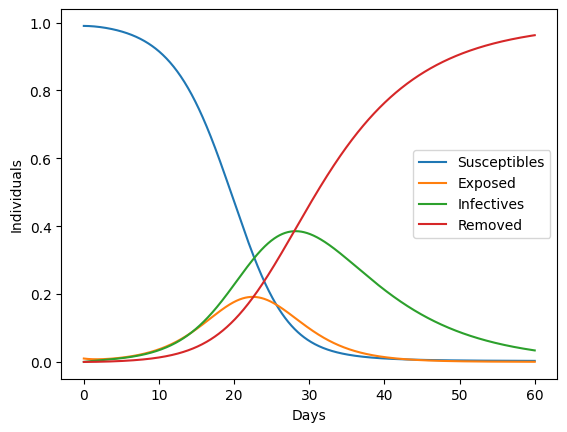

In [198]:
# Graphs together

cur = y

s_Cur = cur.T[0]
e_Cur = cur.T[1]
i_Cur = cur.T[2]
r_Cur = cur.T[3]

# Plot axes
plt.xlabel("Days")
plt.ylabel("Individuals")

# Plotting Solution Curves
plt.plot(t, s_Cur, label = "Susceptibles")
plt.plot(t, e_Cur, label = "Exposed")
plt.plot(t, i_Cur, label = "Infectives")
plt.plot(t, r_Cur, label = "Removed")
plt.legend()
plt.show()

#### Would be nice to try other visualization (e.g. bar graph or histogram), to animate graphs over time.

## Stochastic Decision Tree